In [1]:
import pandas as pd
import math
import numpy as np
import time
import matplotlib.pyplot as plt

In [2]:
url = "https://raw.githubusercontent.com/johnmyleswhite/ML_for_Hackers/master/02-Exploration/data/01_heights_weights_genders.csv"

### Accuracy

In [26]:
def accuracy(df):
    return (df.loc['Alert', 'P'] + df.loc['Non-Alert', 'N']) / (df.loc['Alert', 'P'] + df.loc['Non-Alert', 'N'] + df.loc['Alert', 'N'] + df.loc['Non-Alert', 'P'])

### Precision

In [4]:
def precision(df):
    return df.loc['Alert', 'P'] / (df.loc['Alert', 'P'] + df.loc['Alert', 'N'])

### Recall

In [5]:
def recall(df):
    return df.loc['Alert', 'P'] / (df.loc['Non-Alert', 'P'] + df.loc['Alert', 'P'])

## MCC - Mathew Correlation Coefficent

In [6]:
def mcc(df):
    return ((df.loc['Alert', 'P'] * df.loc['Non-Alert', 'N']) - (df.loc['Alert', 'N'] * df.loc['Non-Alert', 'P'])) / math.sqrt((df.loc['Alert', 'P'] + df.loc['Alert', 'N']) * (df.loc['Alert', 'P'] + df.loc['Non-Alert', 'P']) * (df.loc['Non-Alert', 'N'] + df.loc['Alert', 'N']) * (df.loc['Non-Alert', 'N'] + df.loc['Non-Alert', 'P']))    

## Gerar Matriz de Confusão

In [7]:
def get_confusion_matrix(df, f):
    confusion_dict = {"P":[0, 0], "N":[0, 0]}
    for person_index in range(df.shape[0]):
        weight_expected = f(df.iloc[person_index]['Height'])
        if weight_expected <= df.iloc[person_index]['Weight']:
            if df.iloc[person_index]['Gender'] == 1:
                confusion_dict['P'][0] += 1
            else:
                confusion_dict['N'][0] += 1
        else:
            if df.iloc[person_index]['Gender'] == 0:
                confusion_dict['N'][1] += 1
            else:
                confusion_dict['P'][1] += 1
    return pd.DataFrame(confusion_dict, index =['Alert', 'Non-Alert'])

In [8]:
def report(df, f, is_print=False):
    confusion_matrix = get_confusion_matrix(df, f)
    if is_print:
        print(confusion_matrix)
    return {
        'accuracy' : accuracy(confusion_matrix),
        'precision' : precision(confusion_matrix),
        'recall' : recall(confusion_matrix),
        'mcc' : mcc(confusion_matrix)
    }

### Reta f(x)

In [9]:
def myf(x):
    return (18 / 7) * x - (60 / 7)

### Ler csv para um dataframe

In [10]:
persons = pd.read_csv(url, error_bad_lines=False)
persons.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


### Trocar Male e Female por 1 e 0

In [11]:
persons['Gender'].replace('Female', 0, inplace=True)
persons['Gender'].replace('Male', 1, inplace=True)
persons.head()

,Gender,Height,Weight
0,1,73.847017,241.893563
1,1,68.781904,162.310473
2,1,74.110105,212.740856
3,1,71.730978,220.042470
4,1,69.881796,206.349801


### Trocar a ordem das colunas

In [12]:
persons = persons[['Height', 'Weight', 'Gender']]
persons.head()

,Height,Weight,Gender
0,73.847017,241.893563,1
1,68.781904,162.310473,1
2,74.110105,212.740856,1
3,71.730978,220.042470,1
4,69.881796,206.349801,1


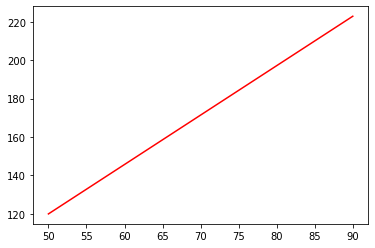

In [13]:
x = np.linspace(50, 90, 1000)
y = myf(x)
plt.plot(x, y, c='red')
plt.draw()

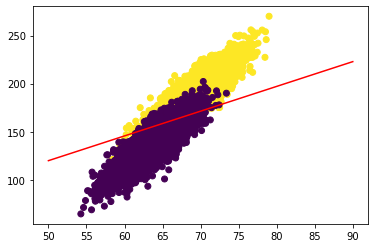

In [14]:
plt.scatter(persons.Height, persons.Weight, c=persons.Gender)
plt.plot(x, y, c='red')
plt.draw()

In [15]:
report(persons, myf, False)

{'accuracy': 0.9189,
 'precision': 0.9254519601868779,
 'recall': 0.9112,
 'mcc': 0.8378993639982237}

In [16]:
def do_reports(min_m, max_m, iter_m, min_b, max_b, iter_b):
    reports = {
        "m" : [],
        "b" : [],
        "accuracy" : [],
        "precision" : [],
        "recall" : [],
        "mcc" : []
    }
    for m in np.arange(min_m, max_m, iter_m):
        for b in np.arange(min_b, max_b, iter_b):
            r = report(persons, lambda x: m * x - b, False)
            reports["m"].append(m)
            reports["b"].append(b)
            reports["accuracy"].append(r["accuracy"])
            reports["precision"].append(r["precision"])
            reports["recall"].append(r["recall"])
            reports["mcc"].append(r["mcc"])
    return pd.DataFrame(reports)

In [17]:
start = time.time()
reports_df = do_reports(2, 3.1, 0.1, 5, 6.1, 0.1)
print(time.time() - start)

467.6395478248596


In [18]:
reports_df.head()

,m,b,accuracy,precision,recall,mcc
0,2.0,5.0,0.5934,0.551534,0.9996,0.320356
1,2.0,5.1,0.5920,0.550683,0.9996,0.317691
2,2.0,5.2,0.5907,0.549895,0.9996,0.315203
3,2.0,5.3,0.5899,0.549412,0.9996,0.313665
4,2.0,5.4,0.5891,0.548929,0.9996,0.312123


## Max Values


In [19]:
reports_df.max()

m            3.000000
b            6.000000
accuracy     0.918200
precision    1.000000
recall       0.999600
mcc          0.836497
dtype: float64

# Min Values

In [20]:
reports_df.min()

m            2.000000
b            5.000000
accuracy     0.562800
precision    0.545514
recall       0.125600
mcc          0.258859
dtype: float64

## Max Accuracy

y = 2.5000000000000004x - 5.0


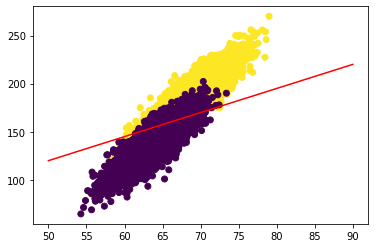

In [21]:
max_accuracy = reports_df.iloc[reports_df['accuracy'].idxmax()]
x = np.linspace(50, 90, 1000)
y = list(map(lambda i: max_accuracy.loc['m'] * i - max_accuracy.loc['b'], x))
plt.scatter(persons.Height, persons.Weight, c=persons.Gender)
plt.plot(x, y, c='red')
plt.draw()
print("y = " + str(max_accuracy.loc['m']) + "x - " + str(max_accuracy.loc['b']))

## Max Precision

y = 3.000000000000001x - 5.0


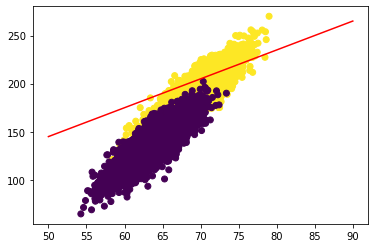

In [22]:
max_precision = reports_df.iloc[reports_df['precision'].idxmax()]
x = np.linspace(50, 90, 1000)
y = list(map(lambda i: max_precision.loc['m'] * i - max_precision.loc['b'], x))
plt.scatter(persons.Height, persons.Weight, c=persons.Gender)
plt.plot(x, y, c='red')
plt.draw()
print("y = " + str(max_precision.loc['m']) + "x - " + str(max_precision.loc['b']))

## Max Recall

y = 2.0x - 5.0


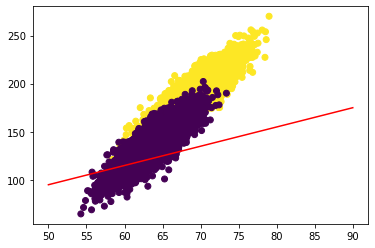

In [23]:
max_recall = reports_df.iloc[reports_df['recall'].idxmax()]
x = np.linspace(50, 90, 1000)
y = list(map(lambda i: max_recall.loc['m'] * i - max_recall.loc['b'], x))
plt.scatter(persons.Height, persons.Weight, c=persons.Gender)
plt.plot(x, y, c='red')
plt.draw()
print("y = " + str(max_recall.loc['m']) + "x - " + str(max_recall.loc['b']))

## Max MCC

y = 2.5000000000000004x - 5.1


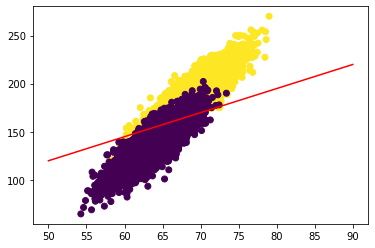

In [24]:
max_mcc = reports_df.iloc[reports_df['mcc'].idxmax()]
x = np.linspace(50, 90, 1000)
y = list(map(lambda i: max_mcc.loc['m'] * i - max_mcc.loc['b'], x))
plt.scatter(persons.Height, persons.Weight, c=persons.Gender)
plt.plot(x, y, c='red')
plt.draw()
print("y = " + str(max_mcc.loc['m']) + "x - " + str(max_mcc.loc['b']))

## Comparação

Max Accuracy(Red) = 2.5000000000000004x - 5.0
Max Precision(Green) = 3.000000000000001x - 5.0
Max Recall(Pink) = 2.0x - 5.0
Max MCC(Cyan) = 2.5000000000000004x - 5.1


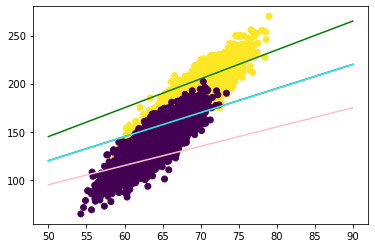

In [25]:
x = np.linspace(50, 90, 1000)
plt.scatter(persons.Height, persons.Weight, c=persons.Gender)
y = list(map(lambda i: max_accuracy.loc['m'] * i - max_accuracy.loc['b'], x))
plt.plot(x, y, c='red')
y = list(map(lambda i: max_precision.loc['m'] * i - max_precision.loc['b'], x))
plt.plot(x, y, c='green')
y = list(map(lambda i: max_recall.loc['m'] * i - max_recall.loc['b'], x))
plt.plot(x, y, c='pink')
y = list(map(lambda i: max_mcc.loc['m'] * i - max_mcc.loc['b'], x))
plt.plot(x, y, c='cyan')
plt.draw()
print("Max Accuracy(Red) = " + str(max_accuracy.loc['m']) + "x - " + str(max_accuracy.loc['b']))
print("Max Precision(Green) = " + str(max_precision.loc['m']) + "x - " + str(max_precision.loc['b']))
print("Max Recall(Pink) = " + str(max_recall.loc['m']) + "x - " + str(max_recall.loc['b']))
print("Max MCC(Cyan) = " + str(max_mcc.loc['m']) + "x - " + str(max_mcc.loc['b']))